In [34]:
from scripts.create_data import create_data_scenario
import random
from datetime import datetime

# Hyperparameters
num_scenarios = 1
aircraft_range = (3, 3)
amount_aircraft_disrupted = 1
average_flights_per_aircraft = 12
std_dev_flights_per_aircraft = 1
min_delta_start_unavailability = 120
max_delta_start_unavailability = 150
min_period_unavailability = 120
max_period_unavailability = 1020
probability_range = (0.0, 0.0)
probability_distribution = 'uniform'
clear_one_random_aircraft = False
clear_random_flights = False
first_flight_dep_time_range = (6, 8)
flight_length_range = (2, 5)
time_between_flights_range = (0, 1)

# Fixed inputs
template_folder = "../data/Template"
data_root_folder = "../data/Training/3ac-1-proactive-example/"
airports = [
    'AMS', 'CDG', 'FRA', 'LHR', 'MAD', 'MUC', 'ORY', 'TXL', 'VIE', 'ZRH', 'BCN', 'BRU', 'CPH', 'DUB', 'IST'
]
aircraft_types = [
    {'Model': 'A320', 'Family': 'Airbus', 'Config': '0/0/123', 'Dist': 5000, 'Cost/h': 1800.0, 
     'TurnRound': 30, 'Transit': 30, 'Orig': ['CFE'], 'Maint': ['NULL']}
    # {'Model': 'B737', 'Family': 'Boeing', 'Config': '10/20/160', 'Dist': 5000, 'Cost/h': 3000.0, 
    # 'TurnRound': 75, 'Transit': 50, 'Orig': ['CDG'], 'Maint': ['NULL']},
]
config_dict = {
    'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}],
    'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}],
    'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}],
    'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}],
    'PenaltyCosts': [200, 300, 400],
    'Weights': [1.0, 0.5, 0.2],
}

# Function to generate scenarios
for i in range(1, num_scenarios + 1):
    scenario_name = f'Scenario_{i:02d}'  # Dynamically generate scenario names
    recovery_start_date = datetime(2024, 9, random.randint(1, 30)).strftime('%d/%m/%y')
    recovery_start_time = f'{random.randint(5, 7)}:00'
    recovery_end_date = recovery_start_date
    recovery_end_time = f'{random.randint(20, 23)}:{random.choice(["00", "30"])}'

    # Call the function for each scenario
    create_data_scenario(
        scenario_name=scenario_name,
        template_folder=template_folder,
        data_root_folder=data_root_folder,
        aircraft_types=aircraft_types,
        total_aircraft_range=aircraft_range,
        amount_aircraft_disrupted=amount_aircraft_disrupted,
        min_delta_start_unavailability=min_delta_start_unavailability,
        max_delta_start_unavailability=max_delta_start_unavailability,
        min_period_unavailability=min_period_unavailability,
        max_period_unavailability=max_period_unavailability,
        average_flights_per_aircraft=average_flights_per_aircraft,
        std_dev_flights_per_aircraft=std_dev_flights_per_aircraft,
        airports=airports,
        config_dict=config_dict,
        recovery_start_date=recovery_start_date,
        recovery_start_time=recovery_start_time,
        recovery_end_date=recovery_end_date,
        recovery_end_time=recovery_end_time,
        clear_one_random_aircraft=clear_one_random_aircraft,
        clear_random_flights=clear_random_flights,
        probability_range=probability_range,
        probability_distribution=probability_distribution,
        first_flight_dep_time_range=first_flight_dep_time_range,
        flight_length_range=flight_length_range,
        time_between_flights_range=time_between_flights_range
    )


*****line: 1 BRU TXL 06:00 09:47 0

*****line: 2 ORY LHR 10:37 14:49 0

*****line: 3 CDG DUB 15:23 19:07 0

*****line: 4 BRU FRA 06:15 09:50 0

*****line: 5 DUB FRA 10:16 14:29 0

*****line: 6 CDG ORY 15:05 18:07 0

*****line: 7 CPH MUC 06:30 09:48 0

*****line: 8 DUB MAD 10:02 12:41 0

*****line: 9 CPH TXL 13:15 17:03 0

*****flights_dict: {1: {'Orig': 'BRU', 'Dest': 'TXL', 'DepTime': '06:00', 'ArrTime': '09:47', 'PrevFlight': 0, 'Aircraft': 'A320#1'}, 2: {'Orig': 'ORY', 'Dest': 'LHR', 'DepTime': '10:37', 'ArrTime': '14:49', 'PrevFlight': 0, 'Aircraft': 'A320#1'}, 3: {'Orig': 'CDG', 'Dest': 'DUB', 'DepTime': '15:23', 'ArrTime': '19:07', 'PrevFlight': 0, 'Aircraft': 'A320#1'}, 4: {'Orig': 'BRU', 'Dest': 'FRA', 'DepTime': '06:15', 'ArrTime': '09:50', 'PrevFlight': 0, 'Aircraft': 'A320#2'}, 5: {'Orig': 'DUB', 'Dest': 'FRA', 'DepTime': '10:16', 'ArrTime': '14:29', 'PrevFlight': 0, 'Aircraft': 'A320#2'}, 6: {'Orig': 'CDG', 'Dest': 'ORY', 'DepTime': '15:05', 'ArrTime': '18:07', 'PrevFlight'

### Visualize them

Processing scenario: Scenario_01
{'A320#1': {'StartDate': '24/09/24', 'StartTime': '07:15', 'EndDate': '24/09/24', 'EndTime': '11:51', 'Probability': 0.0}, 'A320#2': {'StartDate': '24/09/24', 'StartTime': '07:01', 'EndDate': '24/09/24', 'EndTime': '18:46', 'Probability': 1.0}, 'A320#3': {'StartDate': '24/09/24', 'StartTime': '07:09', 'EndDate': '24/09/24', 'EndTime': '09:37', 'Probability': 0.0}}
***alt_aircraft_dict: {'A320#1': {'StartDate': '24/09/24', 'StartTime': '07:15', 'EndDate': '24/09/24', 'EndTime': '11:51', 'Probability': 0.0}, 'A320#2': {'StartDate': '24/09/24', 'StartTime': '07:01', 'EndDate': '24/09/24', 'EndTime': '18:46', 'Probability': 1.0}, 'A320#3': {'StartDate': '24/09/24', 'StartTime': '07:09', 'EndDate': '24/09/24', 'EndTime': '09:37', 'Probability': 0.0}}
***alt_aircraft_dict: {'A320#1': {'StartDate': '24/09/24', 'StartTime': '07:15', 'EndDate': '24/09/24', 'EndTime': '11:51', 'Probability': 0.0}, 'A320#2': {'StartDate': '24/09/24', 'StartTime': '07:01', 'EndDate

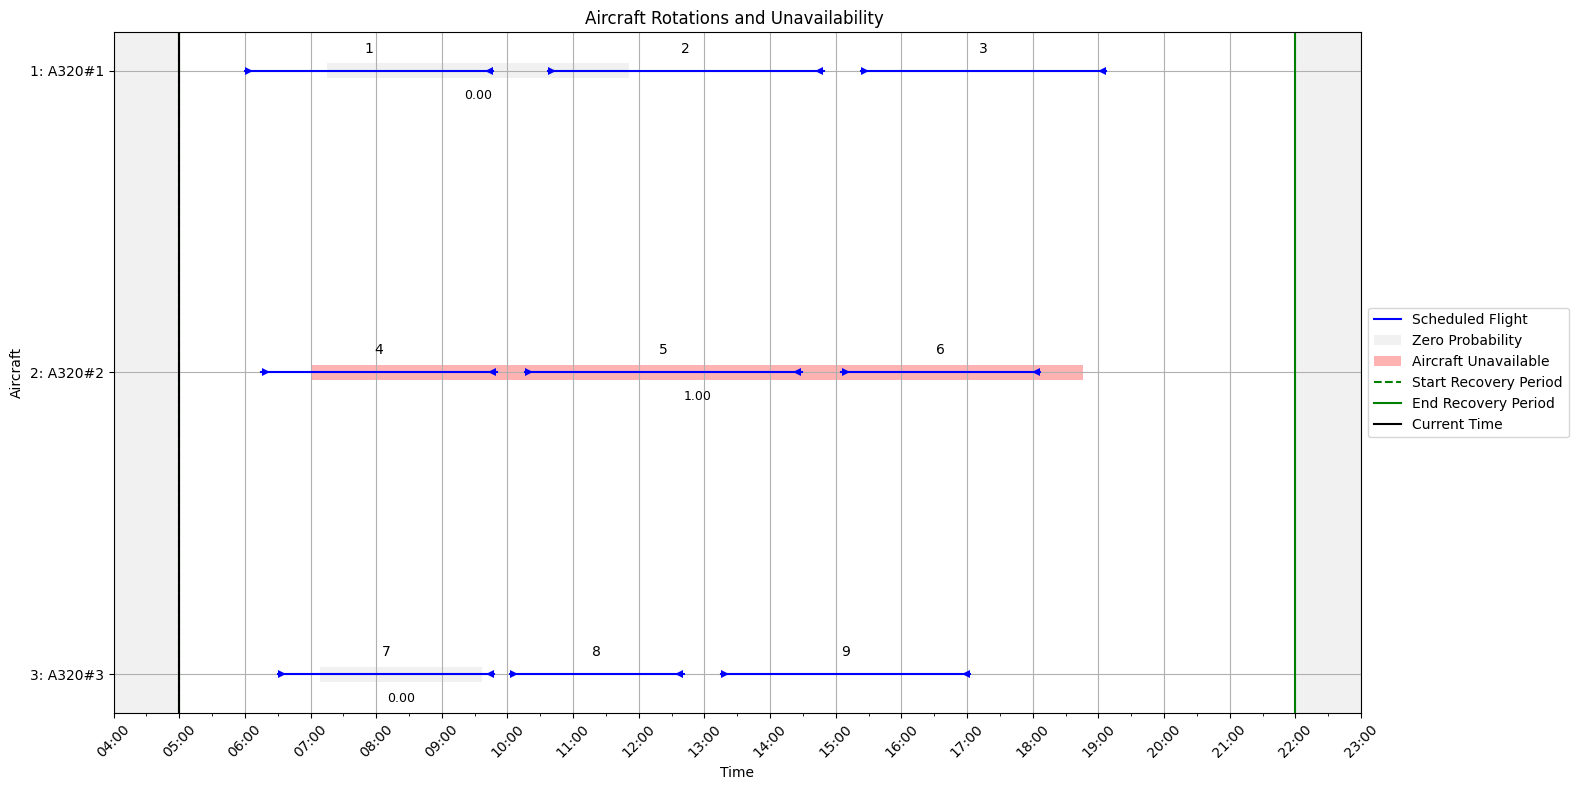

All scenarios processed successfully.


In [35]:
from scripts.visualizations import StatePlotter
from scripts.utils import load_scenario_data
import os
from src.environment import AircraftDisruptionEnv
from datetime import datetime
from scripts.utils import print_state_nicely_proactive

env_type = 'proactive'


# Verify that the root folder exists
if not os.path.exists(data_root_folder):
    raise FileNotFoundError(f"The data root folder does not exist: {data_root_folder}")

# Get the list of scenarios, sorted by name in ascending order
scenarios = sorted(
    [scenario for scenario in os.listdir(data_root_folder) if os.path.isdir(os.path.join(data_root_folder, scenario))]
)

# Process each scenario
for scenario_name in scenarios:
    scenario_path = os.path.join(data_root_folder, scenario_name)
    
    print(f"Processing scenario: {scenario_name}")

    # Verify that the scenario exists
    if not os.path.exists(scenario_path):
        print(f"Scenario {scenario_name} does not exist. Skipping...")
        continue

    # Load scenario data
    data_dict = load_scenario_data(scenario_path)

    # Extract necessary data for the environment
    aircraft_dict = data_dict['aircraft']
    flights_dict = data_dict['flights']
    rotations_dict = data_dict['rotations']
    alt_aircraft_dict = data_dict['alt_aircraft']
    config_dict = data_dict['config']

    # Print configuration details for verification
    # print(config_dict)

    # print alt_aircraft_dict
    print(alt_aircraft_dict)

    # Initialize the environment
    env = AircraftDisruptionEnv(
        aircraft_dict, flights_dict, rotations_dict, alt_aircraft_dict, config_dict, env_type=env_type
    )
    # Print state with print_state_nicely_proactive
    print_state_nicely_proactive(env.state)
    
    # Create StatePlotter object for visualizing the environment state
    state_plotter = StatePlotter(
        aircraft_dict=env.aircraft_dict,
        flights_dict=env.flights_dict,
        rotations_dict=env.rotations_dict,
        alt_aircraft_dict=env.alt_aircraft_dict,
        start_datetime=env.start_datetime,
        end_datetime=env.end_datetime,
        uncertain_breakdowns=env.uncertain_breakdowns,
    )



    # Define the recovery period based on provided configuration
    start_date = config_dict['RecoveryPeriod']['StartDate']
    start_time = config_dict['RecoveryPeriod']['StartTime']
    end_date = config_dict['RecoveryPeriod']['EndDate']
    end_time = config_dict['RecoveryPeriod']['EndTime']
    start_datetime = datetime.strptime(f"{start_date} {start_time}", '%d/%m/%y %H:%M')

    # Plot the state for the current scenario
    print(f"Plotting state for scenario: {scenario_name}")
    state_plotter.plot_state(flights_dict, [], [], set(), env.current_datetime)

print("All scenarios processed successfully.")
